In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys, h5py, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import scipy

import sys
sys.path.append('../../..')
import mutagenesisfunctions as mf
import bpdev as bd
import helper
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency

import contacts

from Bio import AlignIO
import time as time
import pandas as pd
np.random.seed(42)

In [13]:
fam = 'RF00380'

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


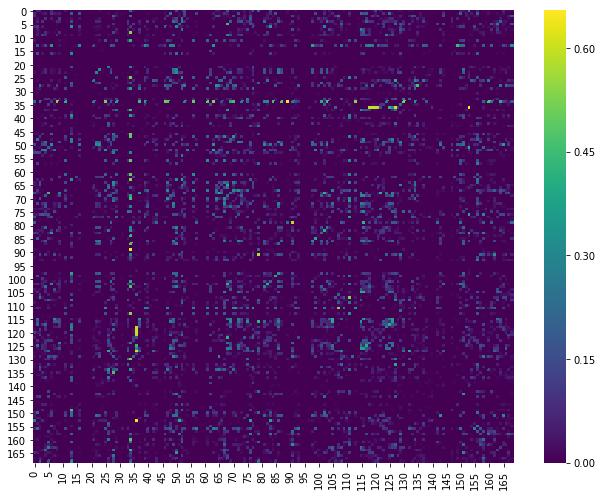

In [14]:
#original MI
filename = 'Arrays/marks_gtests.hdf5'
with h5py.File(filename, 'r') as dataset:
    gtest = np.array(dataset['%s_gtest'%(fam)])
#gtest = contacts.apc_correction(gtest)
    
plt.figure(figsize=(9,7))
sb.heatmap(gtest, vmin=0., cmap='viridis')
plt.show()

In [15]:
#gtest on bpm emitted alignment

#Just calculate the MIs and save them for later access
#Perform Gtest
#gtestsave = 'Arrays/marks_gtests.hdf5'
#with h5py.File(gtestsave, 'w') as f:
filename = '../../data_marks/%s/%s_bpm.hdf5'%(fam, fam)
with h5py.File(filename, 'r') as dataset:
    X_data = np.array(dataset['X_data'])
numdata = X_data.shape[0]
X_data = X_data[numdata//2:, :, 0, :4]
gtest = contacts.g_test(X_data)
gtest[np.isnan(gtest)] = 0.
gtest = contacts.apc_correction(gtest)
    #f.create_dataset('%s_gtest'%(fam), data=gtest.astype(np.float32), compression='gzip')
    #print (fam)
    #print ('Gtest and saving:', mf.sectotime(time.time()-starttime))
    
plt.figure(figsize=(9,7))
sb.heatmap(gtest, vmin=0.)
plt.show()

OSError: Unable to open file (unable to open file: name = '../../data_marks/RF00380/RF00380_bpm.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)